## Checking and Comparing Models accuracy

🔍 Model Comparison:
               Model  R² Score    RMSE
4      Random Forest    0.9813  0.7686
3      Decision Tree    0.9311  1.4748
2   Lasso Regression    0.9004  1.7730
0  Linear Regression    0.8994  1.7816
1   Ridge Regression    0.8994  1.7816


C:\Users\Maryam Sameen\AppData\Local\Temp\ipykernel_9992\3568648300.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="R² Score", y="Model", data=results_df, palette="viridis")


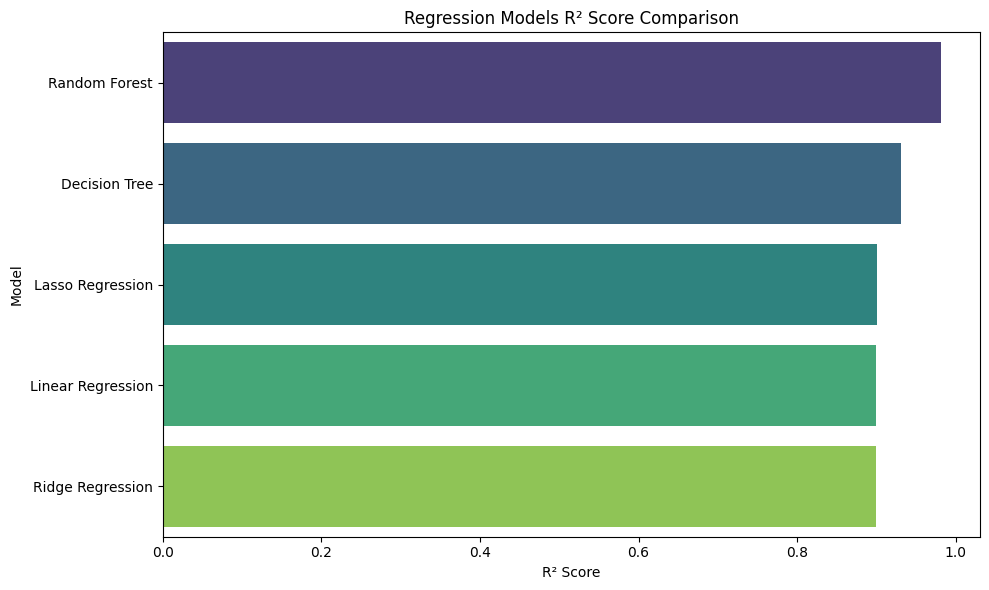

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Advertising.csv')

# Drop the 'Unnamed: 0' column
df.drop('Unnamed: 0', axis=1, inplace=True)

# Features and target
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

# Store results
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    r2 = r2_score(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    results.append({
        "Model": name,
        "R² Score": round(r2, 4),
        "RMSE": round(rmse, 4)
    })

# Create a DataFrame from results
results_df = pd.DataFrame(results).sort_values(by='R² Score', ascending=False)

# Show results
print("🔍 Model Comparison:")
print(results_df)

# Optional: Visualize
plt.figure(figsize=(10, 6))
sns.barplot(x="R² Score", y="Model", data=results_df, palette="viridis")
plt.title("Regression Models R² Score Comparison")
plt.xlabel("R² Score")
plt.ylabel("Model")
plt.tight_layout()
plt.show()


## Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, ConfusionMatrixDisplay
import joblib


## Load and Explore Dataset

In [4]:
# Load dataset
df = pd.read_csv('Advertising.csv')

# Drop index column if exists
if 'Unnamed: 0' in df.columns:
    df.drop('Unnamed: 0', axis=1, inplace=True)

# Display column names and first few rows
print("Columns:", df.columns.tolist())
df.head()


Columns: ['TV', 'Radio', 'Newspaper', 'Sales']


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


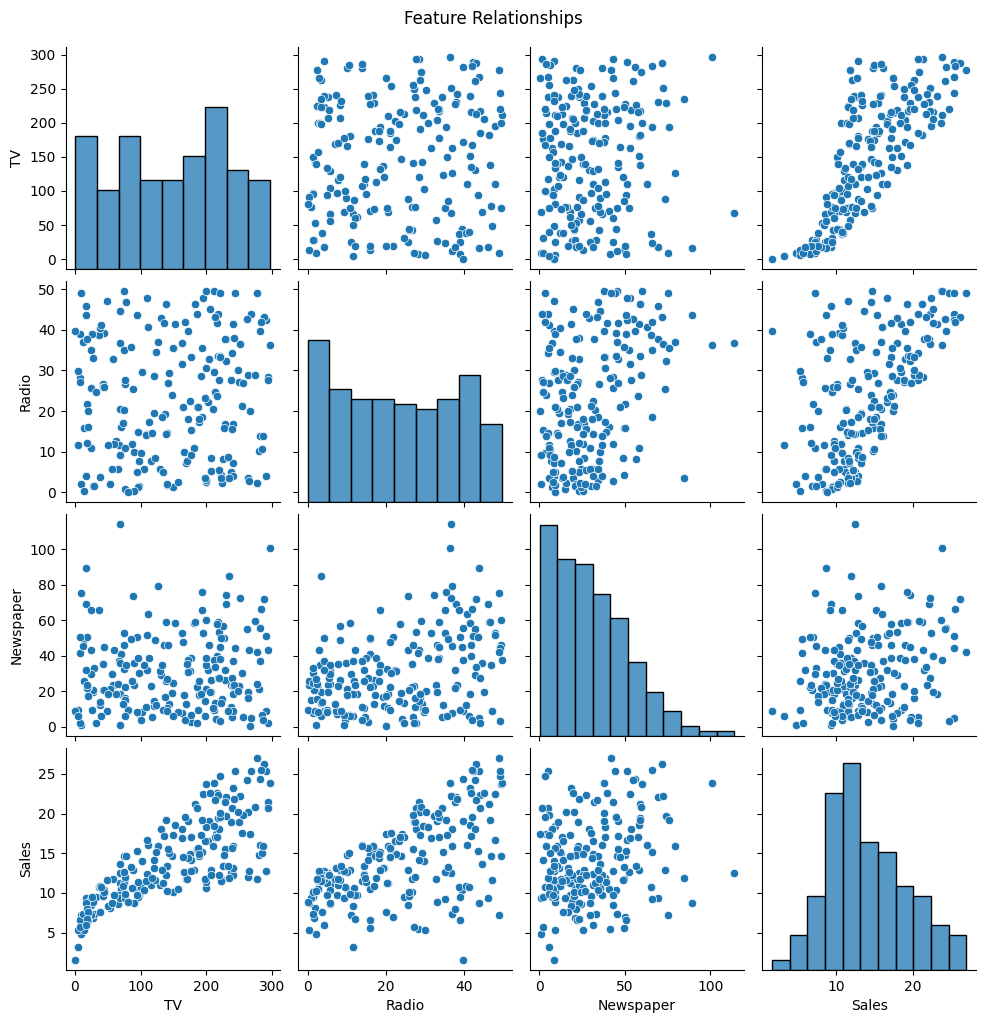

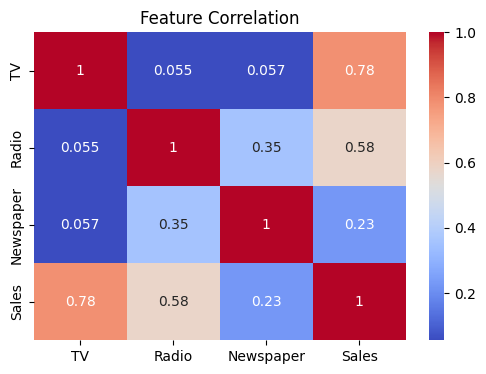

In [5]:
# Pairplot to see feature relationships
sns.pairplot(df)
plt.suptitle("Feature Relationships", y=1.02)
plt.show()

# Correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()


## Train/Test Split

In [6]:
# Define features and target
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Hyperparameter Tuning using GridSearchCV

In [7]:
# Hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Grid Search with 5-fold CV
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
print("Best Params:", grid_search.best_params_)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


## Evaluate the Model

In [8]:
# Predict on test set
y_pred = best_model.predict(X_test)

# Evaluate performance
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"✅ R² Score: {r2:.4f}")
print(f"📉 RMSE: {rmse:.4f}")


✅ R² Score: 0.9818
📉 RMSE: 0.7572


##  Confusion Matrix (Regression-style)

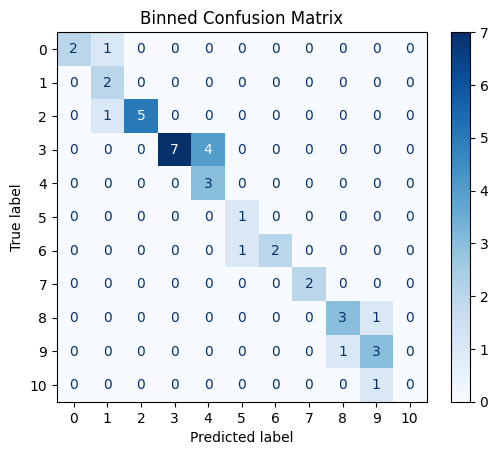

In [9]:
# Bin actual and predicted values into ranges
bins = np.arange(0, max(y.max(), y_pred.max()) + 2, 2)
y_test_binned = np.digitize(y_test, bins)
y_pred_binned = np.digitize(y_pred, bins)

# Confusion Matrix
cm = confusion_matrix(y_test_binned, y_pred_binned)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Binned Confusion Matrix")
plt.show()


## Visualize Feature Importances

C:\Users\Maryam Sameen\AppData\Local\Temp\ipykernel_9992\1185358808.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette='viridis')


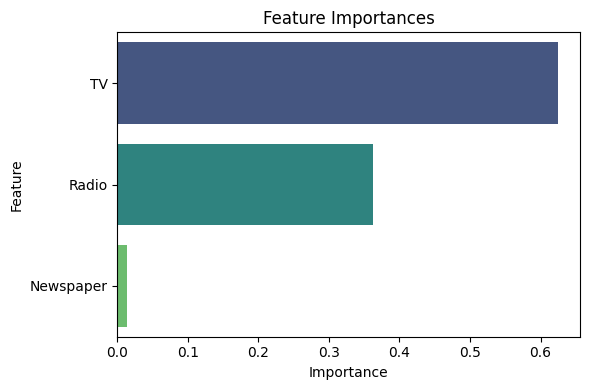

In [10]:
importances = best_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(6,4))
sns.barplot(x=importances, y=feature_names, palette='viridis')
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


## Save the Model

In [11]:
joblib.dump(best_model, "rf_sales_model.pkl")
print("✅ Model saved as rf_sales_model.pkl")


✅ Model saved as rf_sales_model.pkl
